# Import Library

In [1]:
# !pip install flwr
# !pip install flwr tensorflow
# !pip install pydot
# !pip install graphviz
# !pip install visualkeras

In [2]:
import flwr as fl
import tensorflow as tf
from tensorflow import keras
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Data Loading

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print("Train Data Shape:\n",x_train.shape,y_train.shape)

Train Data Shape:
 (60000, 28, 28) (60000,)


In [5]:
print("Test Data Shape:\n",x_test.shape,y_test.shape)

Test Data Shape:
 (10000, 28, 28) (10000,)


In [6]:
classes = np.unique(y_train)
print("#no of classes:{} and all classes {}".format(len(classes),classes))

#no of classes:10 and all classes [0 1 2 3 4 5 6 7 8 9]


*.we can see we are using mnist data for training.* 
*.Training data has 60k data and test data has 10k images with shape 28x28.*

# Data Analysis

In [7]:
def getData(dist, x, y):
    dx = []
    dy = []
    counts = [0 for i in range(10)]
    for i in range(len(x)):
        if counts[y[i]] < dist[y[i]]:
            dx.append(x[i])
            dy.append(y[i])
            counts[y[i]] += 1

    return np.array(dx), np.array(dy)

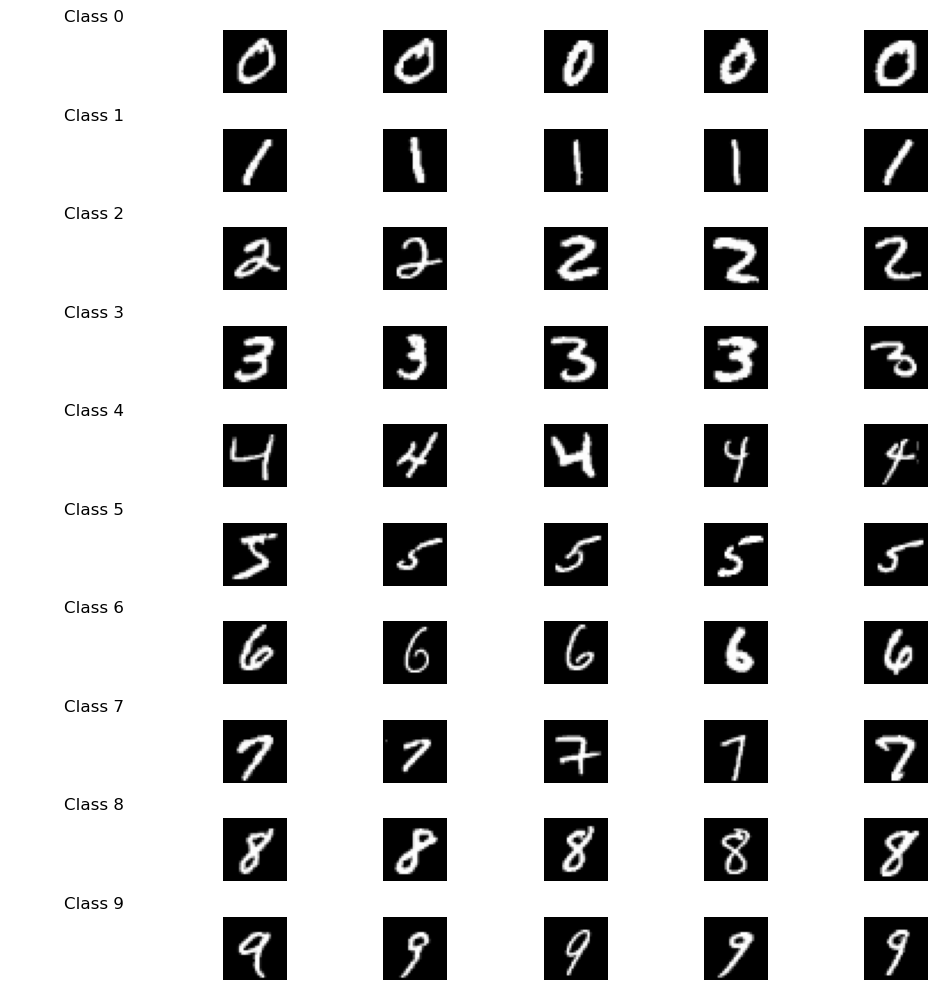

In [8]:
def plot_images_by_class_with_title(x, y, num_images=5):
    """
    Plot 5 images of each class in a single row.
    """
    classes = np.unique(y)
    num_classes = len(classes)
    fig, axs = plt.subplots(num_classes, num_images + 1, figsize=(10, 10))
    for i, class_label in enumerate(classes):
        class_indices = np.where(y == class_label)[0]
        class_indices = class_indices[:num_images] 
        # Set the title for the class
        axs[i, 0].set_title(f"Class {class_label}")
        axs[i, 0].axis('off')
        for j, index in enumerate(class_indices):
            img = x[index].squeeze()
            axs[i, j + 1].imshow(img, cmap='gray')
            axs[i, j + 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage to plot five images from each class in the MNIST dataset
plot_images_by_class_with_title(x_train, y_train, num_images=5)


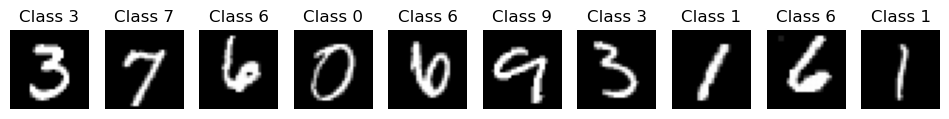

In [9]:
from collections import Counter

def visualize_random_images(x, y, num_images=5):
    """
    Visualize random images from the dataset.
    """
    num_samples = x.shape[0]
    indices = np.random.choice(num_samples, num_images, replace=False)
    
    fig, axs = plt.subplots(1, num_images, figsize=(12, 2))
    for i, index in enumerate(indices):
        img = x[index].squeeze()
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f"Class {y[index]}")
        axs[i].axis('off')
    plt.show()

visualize_random_images(x_train,y_train,num_images=10)

In [10]:

def compute_image_statistics(x):
    """
    Compute basic statistics (mean, std) for pixel values in images.
    """
    mean = np.mean(x)
    std = np.std(x)
    return mean, std
compute_image_statistics(x_train)

(33.318421449829934, 78.56748998339798)

In [11]:

def analyze_image_dimensions(x):
    """
    Analyze image dimensions (height, width, channels).
    """
    dimensions = [img.shape for img in x]
    unique_dimensions = set(dimensions)
    return unique_dimensions
analyze_image_dimensions(x_train)

{(28, 28)}

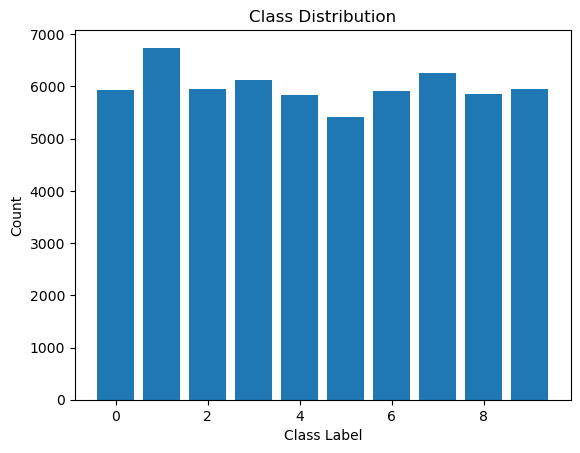

In [12]:
def visualize_class_distribution(y):
    """
    Visualize the distribution of classes in the dataset.
    """
    class_counts = dict(Counter(y))
    class_labels, counts = zip(*class_counts.items())

    plt.bar(class_labels, counts)
    plt.xlabel("Class Label")
    plt.ylabel("Count")
    plt.title("Class Distribution")
    plt.show()
visualize_class_distribution(y_train)

In [13]:
def analyze_data_quality(x):
    """
    Check for corrupted or missing images in the dataset.
    """
    num_missing_images = len([img for img in x if img is None])
    num_corrupted_images = len([img for img in x if np.any(np.isnan(img))])
    print("#No of Missing Images:{} and # No of Corrupted Images:{}".format(num_missing_images,num_corrupted_images))
    
    return num_missing_images, num_corrupted_images
analyze_data_quality(x_train)


#No of Missing Images:0 and # No of Corrupted Images:0


(0, 0)

Class 0: 5923 images


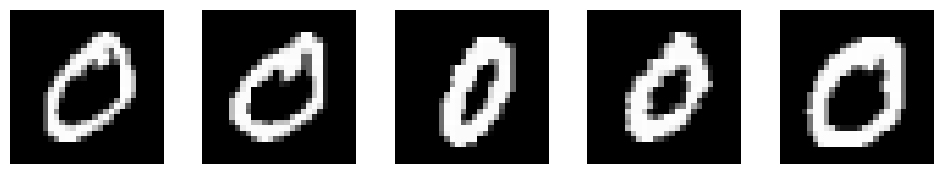

Class 1: 6742 images


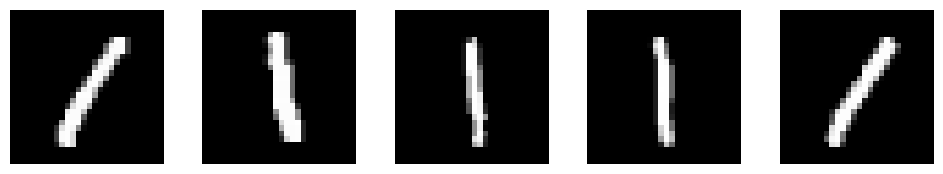

Class 2: 5958 images


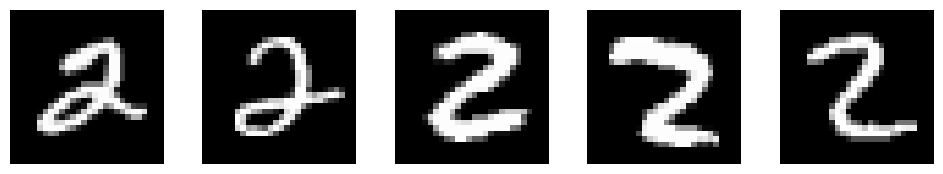

Class 3: 6131 images


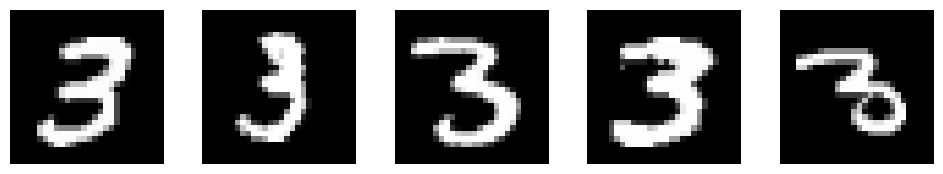

Class 4: 5842 images


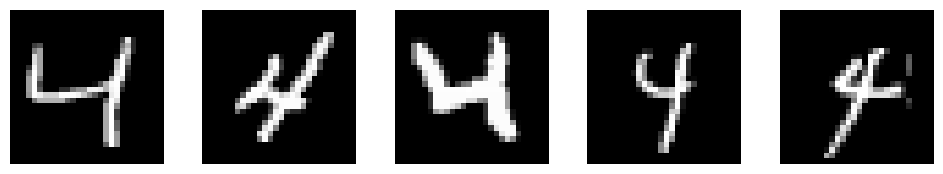

Class 5: 5421 images


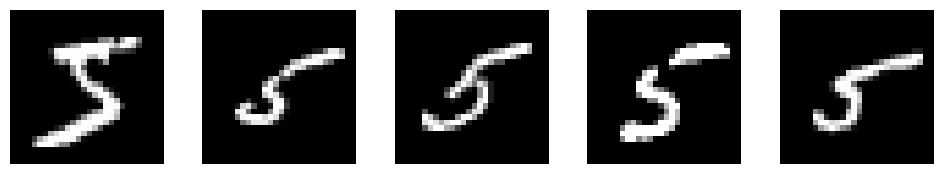

Class 6: 5918 images


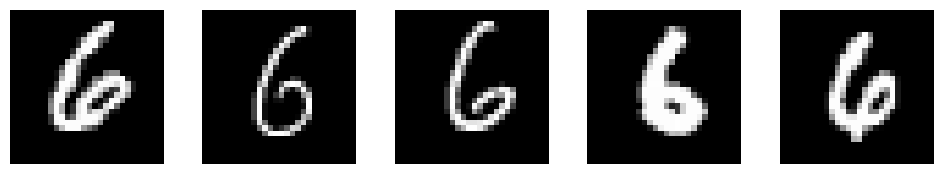

Class 7: 6265 images


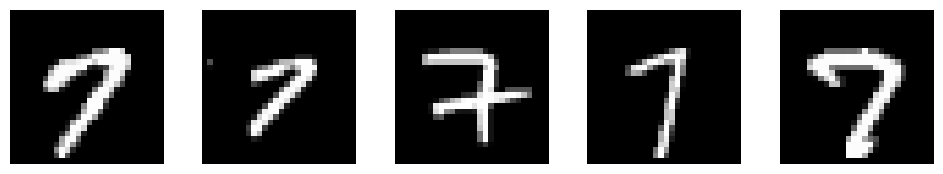

Class 8: 5851 images


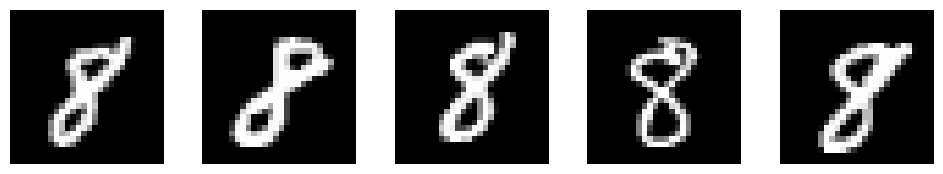

Class 9: 5949 images


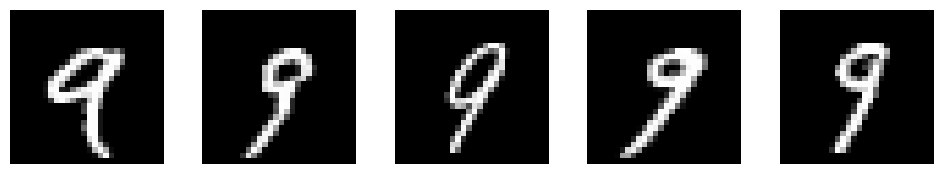

In [14]:
def class_analysis(x, y):
    """
    Analyze each class individually and plot sample images.
    """
    unique_classes = np.unique(y)
    
    for class_label in unique_classes:
        class_indices = np.where(y == class_label)[0]
        num_images = len(class_indices)
        
        print(f"Class {class_label}: {num_images} images")
        
        # Plot a sample image from each class
        sample_indices = class_indices[:min(5, num_images)]
        fig, axs = plt.subplots(1, min(5, num_images), figsize=(12, 2))
        for i, index in enumerate(sample_indices):
            img = x[index].squeeze()
            axs[i].imshow(img, cmap='gray')
            axs[i].axis('off')
        plt.show()
class_analysis(x_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


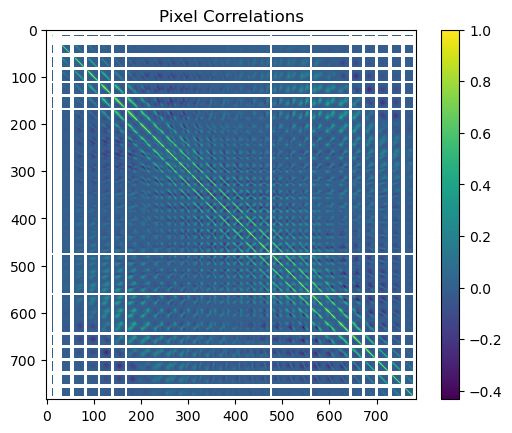

In [15]:
def correlation_analysis(x):
    """
    Examine relationships between pixel values or channels within images.
    """
    # Calculate and visualize pixel correlations
    correlations = np.corrcoef(x.reshape(x.shape[0], -1), rowvar=False)
    
    plt.imshow(correlations, cmap='viridis')
    plt.colorbar()
    plt.title("Pixel Correlations")
    plt.show()
correlation_analysis(x_train)

In [16]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(256, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])
# model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])

# x_train, x_test = x_train[..., np.newaxis] / 255.0, x_test[..., np.newaxis] / 255.0
# dist = [4000, 4000, 4000, 3000, 10, 10, 10, 10, 4000, 10]
# x_train, y_train = getData(dist, x_train, y_train)


# Preprocess Data

In [17]:
import numpy as np
import tensorflow as tf

def preprocess_data(train_samples_per_class=100, test_samples_per_class=20):
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    # Initialize empty lists to store the selected samples for training and testing
    x_train_subset = []
    y_train_subset = []
    x_test_subset = []
    y_test_subset = []

    # Create a list of unique class labels
    unique_classes = np.unique(y_train)

    # Iterate through each class and select samples for training and testing
    for class_label in unique_classes:
        # Get the indices of samples for the current class
        class_indices = np.where(y_train == class_label)[0]

        # Randomly shuffle the indices to ensure randomness
        np.random.shuffle(class_indices)

        # Select the desired number of samples for training and testing from the current class
        selected_indices_train = class_indices[:train_samples_per_class]
        selected_indices_test = class_indices[train_samples_per_class:train_samples_per_class+test_samples_per_class]

        # Add the selected training samples to the training subset
        x_train_subset.extend(x_train[selected_indices_train])
        y_train_subset.extend(y_train[selected_indices_train])

        # Add the selected testing samples to the testing subset
        x_test_subset.extend(x_train[selected_indices_test])
        y_test_subset.extend(y_train[selected_indices_test])

    # Convert the lists to NumPy arrays
    x_train_subset = np.array(x_train_subset)
    y_train_subset = np.array(y_train_subset)
    x_test_subset = np.array(x_test_subset)
    y_test_subset = np.array(y_test_subset)

    # Preprocess the data by normalizing it
    x_train_subset, x_test_subset = x_train_subset[..., np.newaxis] / 255.0, x_test_subset[..., np.newaxis] / 255.0

    return x_train_subset, y_train_subset, x_test_subset, y_test_subset

x_train_subset, y_train_subset, x_test_subset, y_test_subset = preprocess_data(train_samples_per_class=100, test_samples_per_class=20)


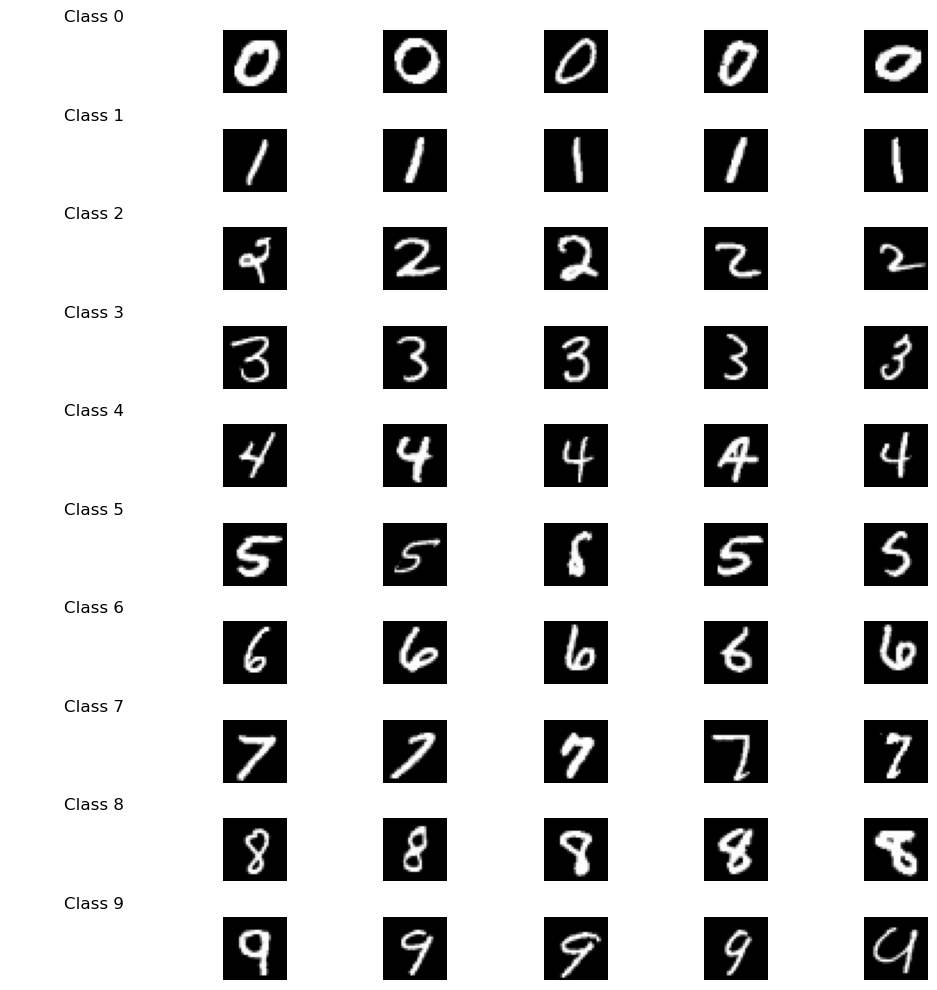

In [18]:
plot_images_by_class_with_title(x_train_subset, y_train_subset, num_images=5)

# Federated Setup

## Client Setup

In [19]:
# Define the client model
def create_client_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [20]:
from tensorflow.keras.utils import plot_model
import visualkeras
model=create_client_model()
plot_model(model, to_file='model_architecture.png', show_shapes=True)
visualkeras.layered_view(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
PORT=5010

In [ ]:
# Define the client logic
class MnistClient(fl.client.NumPyClient):
    def __init__(self):
        self.model = create_client_model()
        self.x_train, self.y_train, self.x_test, self.y_test = preprocess_data()

    def get_parameters(self,config):
        return self.model.get_weights()

    def fit(self, parameters, config):
        self.model.set_weights(parameters)
        self.model.fit(self.x_train, self.y_train, epochs=1, verbose=1)
        return self.model.get_weights(), len(self.x_train), {}

    def evaluate(self, parameters, config):
        self.model.set_weights(parameters)
        loss, accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        return loss, len(self.x_test), {"accuracy": accuracy}

# Start the Flower client
fl.client.start_numpy_client(server_address='localhost:'+str(PORT), client=MnistClient(),grpc_max_message_length = 1024*1024*1024)


INFO flwr 2023-11-03 17:39:58,331 | grpc.py:49 | Opened insecure gRPC connection (no certificates were passed)
DEBUG flwr 2023-11-03 17:39:58,352 | connection.py:42 | ChannelConnectivity.IDLE
DEBUG flwr 2023-11-03 17:39:58,355 | connection.py:42 | ChannelConnectivity.READY


32/32 [==============================] - 2s 5ms/step - loss: 1.5128 - accuracy: 0.6040
